# Group Assignment QF627

*Group Members:*
* Anna Germaine Lim
* Peng Cheng
* Zenith Tay
* Gregory Tan

## Packages Used in This Workbook

In [41]:
## Data Download

import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr

## For Visualisation

## Useful Functions Used in this Sheet

In [30]:
start_date = "2006-11-01"
end_date = "2025-11-13"

In [33]:
def download_data (ticker: list[str] | str,
                   start_date = start_date, 
                   end_date = end_date,
                   close_only = False) -> pd.DataFrame:
    if close_only == False:
        data =\
        (
            yf.download(tickers = ticker,
                        start = start_date,
                        end = end_date)
        )
    else:
        data =\
        (
            yf.download(tickers = ticker,
                        start = start_date,
                        end = end_date)
                        ["Close"]
        )    

    return data

In [6]:
def generate_returns(price_data: pd.DataFrame,
                     price_col: 'str' = 'Close') -> pd.Series:
    
    returns_series = price_data[price_col].pct_change()
    cum_returns_series = (1 + returns_series).cumprod()

    tot_returns = float(cum_returns_series.iloc[-1].iloc[0])

    print('=== Summary of Returns === \n',
          f'Total Returns = {tot_returns: .2%}'
          )

    return tot_returns, returns_series, cum_returns_series

## Download Dataset

In [36]:
spy_data =\
(
    download_data("SPY")
)
spy_data

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY
Date,,,,,
2006-11-01,95.973610,96.990426,95.875435,96.927316,83005600
2006-11-02,95.917542,96.078827,95.623016,95.728200,60693100
2006-11-03,95.749184,96.345254,95.104031,96.261107,71346400
2006-11-06,96.829163,96.969411,96.036742,96.043761,63303300
2006-11-07,97.200829,97.460289,96.773063,96.913312,63318900
...,...,...,...,...,...
2025-11-06,670.309998,677.380005,668.719971,676.469971,85035300
2025-11-07,670.969971,671.080017,661.210022,667.909973,100592400


In [24]:
generate_returns(spy_data);

=== Summary of Returns === 
 Total Returns =  712.05%


In [25]:
spy_data = \
    (
        spy_data
        .droplevel(
            level = 1,
            axis =1
        )
    )

## Project Start

In [10]:
# data wrangling and preperation
train_pct = 0.75
train_test_split_index = int(train_pct*len(spy_data))
spy_train_data =\
    (
        spy_data
        .copy()
        .iloc[ : train_test_split_index]
    )

spy_test_data =\
    (
        spy_data
        .copy()
        .iloc[train_test_split_index : ]
    )

In [11]:
len(spy_train_data) + len(spy_test_data)

4788

In [12]:
spy_train_data

Price,Close,High,Low,Open,Volume
Date,,,,,
2006-11-01,95.973610,96.990426,95.875435,96.927316,83005600
2006-11-02,95.917542,96.078827,95.623016,95.728200,60693100
2006-11-03,95.749184,96.345254,95.104031,96.261107,71346400
2006-11-06,96.829163,96.969411,96.036742,96.043761,63303300
2006-11-07,97.200829,97.460289,96.773063,96.913312,63318900
...,...,...,...,...,...
2021-02-02,357.220337,358.783861,352.323848,355.441497,64450700
2021-02-03,357.501190,359.233230,356.218553,358.053565,52427100
2021-02-04,361.564453,361.611253,357.613542,358.540405,47142600


In [13]:
%whos

Variable                 Type         Data/Info
-----------------------------------------------
datetime                 type         <class 'datetime.datetime'>
download_data            function     <function download_data at 0x0000029BD3BBACA0>
generate_returns         function     <function generate_returns at 0x0000029BE4AC8720>
np                       module       <module 'numpy' from 'c:\<...>ges\\numpy\\__init__.py'>
pd                       module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
spy_data                 DataFrame    Shape: (4788, 5)
spy_test_data            DataFrame    Shape: (1197, 5)
spy_train_data           DataFrame    Shape: (3591, 5)
train_pct                float        0.75
train_test_split_index   int          3591
yf                       module       <module 'yfinance' from '<...>\\yfinance\\__init__.py'>


In [14]:
spy_train_data


Price,Close,High,Low,Open,Volume
Date,,,,,
2006-11-01,95.973610,96.990426,95.875435,96.927316,83005600
2006-11-02,95.917542,96.078827,95.623016,95.728200,60693100
2006-11-03,95.749184,96.345254,95.104031,96.261107,71346400
2006-11-06,96.829163,96.969411,96.036742,96.043761,63303300
2006-11-07,97.200829,97.460289,96.773063,96.913312,63318900
...,...,...,...,...,...
2021-02-02,357.220337,358.783861,352.323848,355.441497,64450700
2021-02-03,357.501190,359.233230,356.218553,358.053565,52427100
2021-02-04,361.564453,361.611253,357.613542,358.540405,47142600


### Part 1

#### Momentum Trading Strategy

In [15]:
#Bollinger Strategy
"""
SMA 20 days
std dev same period as sma
upper lower bands 2 s.d. from sma
"""
def compute_bollinger_bands(
    old_df: pd.DataFrame,
    period: int,
    bands: int) -> pd.DataFrame:

    df = old_df.copy()

    #compute the SMA
    df[f'sma_{period}'] =\
    (
        df['Close']
        .rolling(period)
        .mean()
    )
    
    #compute std dev
    df[f'std_dev_bands'] =\
        (
            df['Close']
            .rolling(period)
            .std(ddof=1)
        )

    #compute bands
    df[f'upper_band_{bands}sd'] =\
        (
            (df[f'std_dev_bands'] * bands) +
            df[f'sma_{period}']
        )
    df[f'lower_band_{bands}sd'] =\
        (
            df[f'sma_{period}'] -
            (df[f'std_dev_bands'] * bands)
        )
    
    return df

In [16]:
bollinger_train_data = \
    (
        compute_bollinger_bands(
            spy_train_data,
            20,
            2)
    )

<Axes: xlabel='Date'>

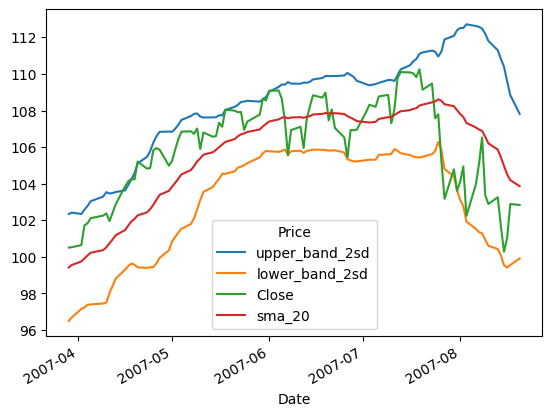

In [17]:
bollinger_train_data[['upper_band_2sd','lower_band_2sd','Close','sma_20']][100:200].plot()


In [18]:
a = [2,4,5,4]
pd.to_frame(a)

AttributeError: module 'pandas' has no attribute 'to_frame'

In [ ]:
#Signal Generate
def generate_signal_bollinger(
    old_df:pd.DataFrame
) -> pd.DataFrame:
    df = old_df.copy()

    df['prev_close'] = \
        (
            df['Close']
            .shift(1)
        )
    
    signal = 0
    lst_signal = []
    for index, item in enumerate(df['Close']):
        if signal == 0:
            if (df['prev_close'].iloc[index] < df['Close'].iloc[index]) & (df['Close'].iloc[index] < df['lower_band_2sd'].iloc[index]):
                signal = 1
            if (df['prev_close'].iloc[index] > df['Close'].iloc[index]) & (df['Close'].iloc[index] > df['upper_band_2sd'].iloc[index]):
                signal =-1
        
        if signal ==-1:
            if df['Close'].iloc[index] < df['lower_band_2sd'].iloc[index]:
                signal = 1
            if df['Close'].iloc[index] < df['sma_20'].iloc[index]:
                signal = 0
        
        if signal == 1:
            if df['Close'].iloc[index] > df['upper_band_2sd'].iloc[index]:
                signal =-1
            if df['Close'].iloc[index] > df['sma_20'].iloc[index]:
                signal = 0
        lst_signal.append(signal)
    
    df['signals'] = \
        (
            lst_signal
        )
    df['position'] = \
        (
            df['signals']
            .shift(1)
            .fillna(0)
        )
    return df

In [ ]:
bollinger_train_data = \
(
    generate_signal_bollinger(bollinger_train_data)
)

In [ ]:
def compute_returns(
    old_df: pd.DataFrame
) -> pd.DataFrame:
    df = old_df.copy()

    df['daily_return'] = \
        (
            df['Close']
            .pct_change()
        )   

- Prof's momentum strat
- Range breakout momentum

#### Mean-Reversion Strategy

### Machine Learning

In [215]:
### imports for supervised learning

# Model specification

# linear models
from sklearn.linear_model import LinearRegression # Linear Regression
from sklearn.linear_model import ElasticNet # Elastic Net
from sklearn.linear_model import Lasso # LASSO

# oldies
from sklearn.svm import SVR # Support Vector Machine
from sklearn.neighbors import KNeighborsRegressor # K-Nearest Neighbor

# decision tree
from sklearn.tree import DecisionTreeRegressor# Decision Tree

# bagging
from sklearn.ensemble import RandomForestRegressor # Random Forest
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees

# boosting
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting Tree
from sklearn.ensemble import AdaBoostRegressor # Adaptive Boosting

# time-series
import statsmodels.tsa.arima.model as stats # ARIMA
from statsmodels.graphics.tsaplots import plot_acf

# Data split
from sklearn.model_selection import train_test_split

# feature engineering

from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error

from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from matplotlib.ticker import MaxNLocator

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

In [216]:
stock_ticker = ["META", "AMZN", "AAPL", "NFLX", "GOOG", "SPY"]
forex_ticker = ["DEXUSEU", "DEXJPUS", "DEXUSUK", "DEXSZUS", "DEXCAUS", "DEXUSAL", "DEXUSNZ", "DEXNOUS", "DEXSDUS"]
index_ticker = ["DX-Y.NYB","GC=F", "CL=F", "HG=F", "^VIX"]
yield_ticker = ["^IRX", "^FVX", "^TNX"]

In [87]:
### download data
stock_data =\
(
    download_data(stock_ticker,
                  close_only = True)
)

forex_data =\
(
    pdr
    .get_data_fred(forex_ticker,
                  stock_data.index[0],
                  stock_data.index[-1])
)

index_data =\
(
    download_data(index_ticker,
                  close_only = True)
)

yield_data =\
(
    download_data(yield_ticker,
                  close_only = True)
)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  3 of 3 completed


In [88]:
index_data

Ticker,CL=F,DX-Y.NYB,GC=F,HG=F,^VIX
Date,,,,,
2006-11-01,58.709999,85.320000,616.599976,3.2305,11.510000
2006-11-02,57.880001,85.339996,625.400024,3.2840,11.420000
2006-11-03,59.139999,85.709999,626.900024,3.3155,11.160000
2006-11-06,60.020000,85.750000,625.799988,3.3325,11.160000
2006-11-07,58.930000,85.430000,625.700012,3.3455,11.090000
...,...,...,...,...,...
2025-11-06,59.430000,99.730003,3979.899902,4.9455,19.500000
2025-11-07,59.750000,99.599998,3999.399902,4.9380,19.080000
2025-11-10,60.130001,99.620003,4111.799805,5.0870,17.600000


In [89]:
index_data = index_data.where(index_data > 0)
index_data = index_data.ffill()

In [271]:
# technical indicators
technical_data1 = {}
technical_data2 = {}
target_data =\
(
    stock_data.loc[: , "SPY"]
    .copy()
)

In [272]:
sma_periods = [5, 10, 21, 50, 63, 100, 200, 252, 500]
ema_periods = [5, 10, 21, 50, 63, 100, 200, 252, 500]
rsi_periods = [2, 5, 7, 10, 14, 21, 28]
ROC_periods = [5, 10, 21, 50, 63, 126, 200, 252]        
MOM_periods = [5, 10, 21, 50, 63, 126, 200, 252]         
stochastic_periods = [5, 10, 14, 21]
return_period = 5    

In [273]:
# sma
for i in sma_periods:
    technical_data1[f"{i}_SMA"] =\
    (
        target_data
        .rolling(window = i)
        .mean()
    )

    # ema
for i in ema_periods:
    technical_data1[f"{i}_EMA"] =\
    (
        target_data
        .ewm(span = i)
        .mean()
    )

# rsi
def RSI(data, period):
    price_diff =\
    (
        data
        .diff()
        .dropna()
    )

    up = price_diff * 0
    down = up.copy()

    up[price_diff > 0] = price_diff[price_diff > 0]
    down[price_diff < 0] = -price_diff[price_diff < 0]

    up[up.index[period - 1]] = np.mean( up[ :period])
    up = up.drop(up.index[ :(period - 1)]
                )
    down[down.index[period - 1]] = np.mean( down[ :period])
    down = down.drop(down.index[ :(period - 1)]
                    )

    rs =\
    (
        up.ewm(com = period - 1,
               adjust = False).mean()
        /
        down.ewm(com = period - 1,
                 adjust = False).mean()
    )

    return 100 - 100 / (1 + rs)
    
for i in rsi_periods:
    technical_data2[f"{i}_RSI"] = RSI(target_data, i)

# RoC
def ROC(data, period):
    M = data.diff(period - 1)
    N = data.shift(period - 1)
    ROC = (M / N) * 100

    return ROC
for i in ROC_periods:
    technical_data2[f"{i}_ROC"] = ROC(target_data, i)   

# Price momentum
def MOM(data, periods):
    MOM = data.diff(periods)
    return MOM
for i in MOM_periods:
    technical_data2[f"{i}_MOM"] = MOM(target_data, i)

# Stochastic Oscillator data
stochastic_oscillator_data =\
(
    yf
    .download("SPY",
              start_date,
              end_date)
    [["Close", "Low", "High"]]
)

stochastic_oscillator_data.columns =\
(
    stochastic_oscillator_data
    .columns
    .droplevel(1)
)

# Stochastic Oscillator
def STOK(df = stochastic_oscillator_data
         , period = 1):
    STOK =\
    (
        ((df["Close"] - df["Low"].rolling(period).min())
        /
        (df["High"].rolling(period).max() - df["Low"].rolling(period).min())
        ) * 100
    )

    return STOK

def STOD(df = stochastic_oscillator_data
         , period = 1):
    STOK =\
    (
        ((df["Close"] - df["Low"].rolling(period).min())
        /
        (df["High"].rolling(period).max() - df["Low"].rolling(period).min())
        ) * 100
    )

    STOD = STOK.rolling(3).mean()
    return STOD

for i in stochastic_periods:
        technical_data2[f"{i}_%K"] = STOK(period = i)
        technical_data2[f"{i}_%D"] = STOD(period = i) 

[*********************100%***********************]  1 of 1 completed


In [274]:
# convert to df    
technical_data1 =\
(
    pd
    .DataFrame(technical_data1)
)

technical_data2 =\
(
    pd
    .DataFrame(technical_data2)
)

In [275]:
# setting of variables
Y =\
(
    np
    .log(stock_data.loc[ : , "SPY"]
        )
    .diff(return_period)
    .shift(-return_period)
)

Y.name =\
(
    Y
    .name
    +
    "_pred"
)

In [276]:
X1 =\
(
    np
    .log(stock_data.loc[ : , ("META", "AMZN", "AAPL", "NFLX", "GOOG")]
        )
    .diff(return_period)   
)

X2 =\
(
    np
    .log(forex_data)
    .diff(return_period)
)

X3 =\
(
    np
    .log(index_data)
    .diff(return_period)
)

X4 =\
(
    yield_data
    .diff(return_period)
    * 100
)

X5 =\
pd.concat(
    [np
     .log(stock_data.loc[ : , "SPY"]
         )
     .diff(i) for i in [return_period,
                        return_period * 3, # 15
                        return_period * 6, # 30
                        return_period * 12 # 60
                       ]
    ],
    axis = 1
).dropna()
X5.columns = ["SPY_DT", "SPY_3DT", "SPY_6DT", "SPY_12DT"]


X6 =\
(
    np
    .log(technical_data1)
    .diff(return_period)
)

X7 =\
(
    technical_data2
    .diff(return_period)
)



In [277]:
X =\
(
    pd
    .concat([X1, X2, X3, X4, X5, X6],
           axis =1)
)

X

,META,AMZN,AAPL,NFLX,GOOG,DEXUSEU,DEXJPUS,DEXUSUK,DEXSZUS,DEXCAUS,...,500_SMA,5_EMA,10_EMA,21_EMA,50_EMA,63_EMA,100_EMA,200_EMA,252_EMA,500_EMA
2006-11-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-11-06,-0.073987,0.086682,-0.006024,0.007338,0.012129,-0.002164,-0.007814,-0.003047,0.006091,0.010317,...,0.004551,-0.007866,-0.001084,0.002845,0.004648,0.004949,0.005241,0.004855,0.004650,0.004112
2025-11-07,-0.041957,0.000778,-0.007052,-0.013678,-0.007551,0.003201,-0.006447,0.001825,0.001618,0.004629,...,0.004496,-0.010702,-0.003865,0.001088,0.003806,0.004263,0.004791,0.004624,0.004465,0.004014
2025-11-10,-0.009374,-0.022294,0.002380,0.017999,0.022517,0.001213,-0.000909,0.000532,-0.001363,-0.001425,...,0.004464,-0.008052,-0.003667,0.000732,0.003540,0.004035,0.004633,0.004543,0.004400,0.003981
2025-11-11,-0.000383,-0.000883,0.020079,0.039011,0.048026,NaN,NaN,NaN,NaN,NaN,...,0.004473,-0.001561,-0.000919,0.001711,0.003856,0.004273,0.004774,0.004618,0.004462,0.004017


In [278]:
data =\
(
    pd
    .concat([Y, X],
           axis = 1)
    .dropna()
)

data =\
(
    data
    .iloc[ : :return_period, : ]
)

In [279]:
Y =\
(
    data
    .loc[ : ,Y.name]
)

X =\
(
    data
    .loc[ : , X.columns]
)

In [280]:
testing_set = 0.25

train_size = int(len(X) * (1 - testing_set))

Y_train, Y_test =\
(
    Y[0 : train_size],
    Y[train_size:len(Y)]
)

X_train, X_test =\
(
    X[0: train_size],
    X[train_size:len(X)]
)

In [281]:
scaler = StandardScaler()
scaler.fit(X_train)

,copy,True
,with_mean,True
,with_std,True


In [282]:
X_train_scaled =\
    (
        pd
        .DataFrame(
            scaler.transform(X_train),
            index = X_train.index,
            columns = X_train.columns
        )
    )

X_test_scaled =\
    (
        pd
        .DataFrame(
            scaler.transform(X_test),
            index = X_test.index,
            columns = X_test.columns
        )
    )

In [283]:
models =\
[
    ("LR", LinearRegression()),
    ("Elastic Net Penalty", ElasticNet()),
    ("LASSO", Lasso()),
    ("Support Vector Machine", SVR()),
    ("K-Nearest Neighbors", KNeighborsRegressor()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Extra Trees Algo", ExtraTreesRegressor()),
    ("Random Forest", RandomForestRegressor()),
    ("Gradient Boosting", GradientBoostingRegressor()),
    ("Adaptive Boosting", AdaBoostRegressor())
]

In [290]:
names = []

train_results = []
test_results = []

kfold_results = []

best_models = {}
ml_equity_curves = {}
results = []
ncomps_list = [5, 10 ,15, 20, 25, 30, 35, 40]

In [291]:
seed = 627
num_folds = 10
ncomps = 30
metric = "neg_mean_squared_error"

Variance preserved by first 30 components == 99.18%


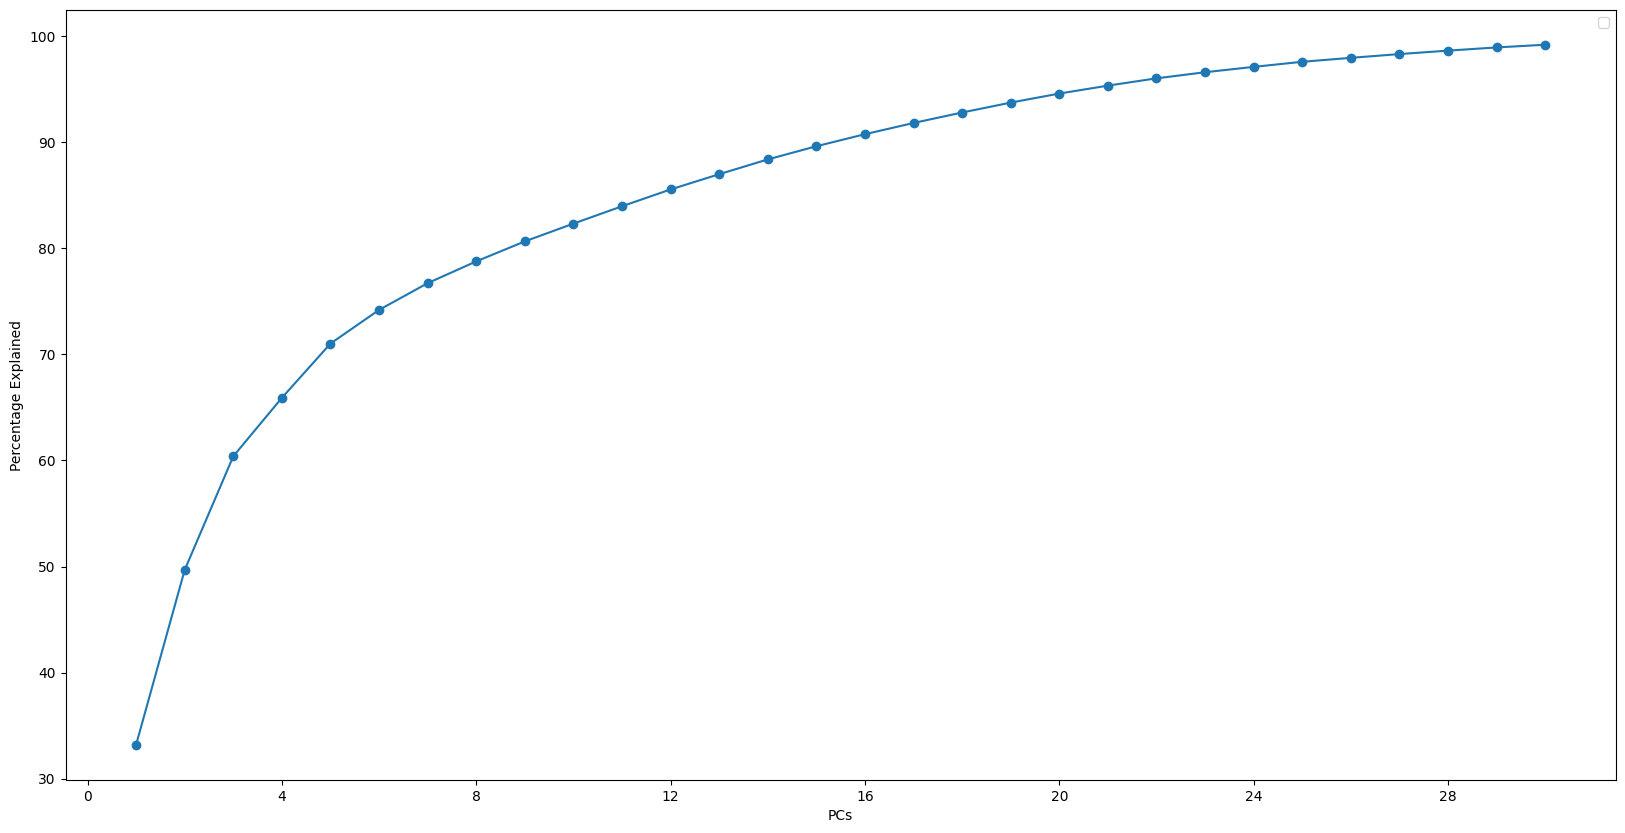

In [292]:
svd_for_plot = TruncatedSVD(n_components=ncomps, random_state=seed)
svd_for_plot.fit(X_train_scaled)

plt_data = pd.DataFrame(
    svd_for_plot.explained_variance_ratio_.cumsum() * 100,
    index=np.arange(1, ncomps + 1),
    columns=["cum_var_explained"]
)

ax = plt_data.plot(kind="line", figsize=(20, 10), style="o-")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel("PCs")
ax.set_ylabel("Percentage Explained")
ax.legend("")

print(
    "Variance preserved by first {} components == {:.2%}".format(
        ncomps,
        svd_for_plot.explained_variance_ratio_.cumsum()[-1]
    )
)

In [293]:
param_grids =\
{
    "LR":\
    {
        "model__fit_intercept": [True, False]
    },

    "Elastic Net Penalty":\
    {
        "model__alpha": np.logspace(-4, 2, 7),
        "model__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9],
        "model__max_iter": [5000]
    },

    "LASSO":\
    {
        "model__alpha": np.logspace(-5, 1, 7),
        "model__max_iter": [5000]
    },

    "Support Vector Machine":\
    {
        "model__C": [0.1, 1, 10],
        "model__gamma": ["scale", "auto"],
        "model__epsilon": [0.001, 0.01, 0.1],
        "model__kernel": ["rbf"]
    },

    "K-Nearest Neighbors":\
    {
        "model__n_neighbors": [3, 5, 9, 15],
        "model__weights": ["uniform", "distance"]
    },

    "Decision Tree":\
    {
        "model__max_depth": [3, 5, 10, None],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4]
    },

    "Extra Trees Algo":\
    {
        "model__n_estimators": [100, 300],
        "model__max_depth": [None, 10],
        "model__min_samples_split": [2, 5, 10],
        "model__min_samples_leaf": [1, 2, 4],
        "model__max_features": ["sqrt", None]
    },

    "Random Forest":\
    {
        "model__n_estimators": [150, 300],
        "model__max_depth": [None, 10],
        "model__min_samples_split": [2, 10],
        "model__min_samples_leaf": [1, 2],
        "model__max_features": ["sqrt", None]
    },

    "Gradient Boosting":\
    {
        "model__n_estimators": [100, 200],
        "model__learning_rate": [0.05, 0.1],
        "model__max_depth": [2, 3],
        "model__subsample": [0.6, 0.8],
        "model__min_samples_split": [2],
        "model__min_samples_leaf": [1, 2]
    },

    "Adaptive Boosting":\
    {
        "model__n_estimators": [50, 150],
        "model__learning_rate": [0.05, 0.5],
        "model__loss": ["linear", "square"]
    }
}


In [294]:
def calculate_ml_results(y_true,
                        y_pred,
                        return_period = return_period,
                        initial_capital = 1e5
                        ):
    data =\
    (
        pd
        .concat(
            [y_true.rename("y_true"),
             y_pred.rename("y_pred")],
             axis = 1
        )
        .dropna()
    )

    signal =\
    (
        np
        .sign(data["y_pred"])   
    )

    position =\
    (
        signal
        .shift(1)
        .fillna(0)
    )

    strategy_returns =\
    (
        position
        *
        data["y_true"]
    )

    equity_curve =\
    (
        np
        .exp(strategy_returns.cumsum())
        *
        initial_capital
    )

    periods_per_year =\
    (
        252
        /
        return_period
    )

    mean_return =\
    (
        strategy_returns
        .mean()
    )

    std_return =\
    (
        strategy_returns
        .std()
    )

    sharpe =\
    (
        mean_return
        /
        std_return
        *
        np.sqrt(periods_per_year)
    )

    n_periods = strategy_returns.shape[0]
    years = n_periods / periods_per_year

    final_equity = equity_curve.iloc[-1]

    cagr =\
    (
        (final_equity / initial_capital) ** (1/ years)
        - 1
    )

    running_max =\
    (
        equity_curve
        .cummax()
    )

    drawdown =\
    (
        equity_curve
        /
        running_max
        - 1
    )

    max_drawdown = drawdown.min()
    
    results =\
    {
        "sharpe": sharpe,
        "cagr": cagr,
        "max_drawdown": max_drawdown,
        "final_equity": final_equity,
        "equity_curve": equity_curve
    }

    return results

In [295]:
for ncomps in ncomps_list:
    print(f"\n===== Running models for ncomps = {ncomps} =====")

    for name, model in models:

        names.append(f"{name}_nc{ncomps}")

        kfold =\
        (
            KFold(n_splits = num_folds,
                random_state = seed,
                shuffle = True)
        )

        # run SVD
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("svd", TruncatedSVD(n_components = ncomps, random_state = seed)),
            ("model", model)
        ])

        param_grid = param_grids.get(name, {})

        grid_search =\
        (
            GridSearchCV(estimator = pipe,
                        param_grid = param_grid,
                        cv = kfold,
                        scoring = metric,
                        n_jobs = -1)
        )

        grid_search.fit(X_train, Y_train)

        res = grid_search.best_estimator_
        best_models[(name, ncomps)] = res
        best_index = grid_search.best_index_

        cv_scores =\
        (
            np
            .array(
                [grid_search.cv_results_[f"split{i}_test_score"][best_index]
                for i in range(num_folds)]
            )
        )
        
        cv_scores = -1 * cv_scores

        kfold_results.append(cv_scores)

        train_result = mean_squared_error(res.predict(X_train), Y_train)
        train_results.append(train_result)

        # Assess the performance in Testing Set

        test_result = mean_squared_error(res.predict(X_test), Y_test)
        test_results.append(test_result)

        y_pred_test =\
        (
            pd
            .Series(res.predict(X_test),
                    index = Y_test.index,
                    name = f"{name}_nc{ncomps}_pred"
                    )
        )

        bt_results =\
        (
            calculate_ml_results(y_true = Y_test,
                                y_pred = y_pred_test)
        )
        
        ml_equity_curves[(name, ncomps)] = bt_results["equity_curve"]

        results.append(
            {
                "Model": name,
                "ncomps": ncomps,
                "CV_MSE_mean": cv_scores.mean(),
                "CV_MSE_std":  cv_scores.std(),
                "Train_MSE":   train_result,
                "Test_MSE":    test_result,
                "Sharpe":      bt_results["sharpe"],
                "CAGR":        bt_results["cagr"],
                "Max_Drawdown":bt_results["max_drawdown"],
                "Final_Equity":bt_results["final_equity"],
                "Best_Params": grid_search.best_params_
            }
        )
        user_interface_message = "%s: %f (%f) %f %f Sharpe=%f CAGR=%f MDD=%f Final=%f" %\
        (
            name, 
            cv_scores.mean(), 
            cv_scores.std(), 
            train_result, 
            test_result,
            bt_results["sharpe"],
            bt_results["cagr"],
            bt_results["max_drawdown"],
            bt_results["final_equity"]
        )
        print(user_interface_message)


===== Running models for ncomps = 5 =====


LR: 0.000438 (0.000136) 0.000412 0.000505 Sharpe=1.101405 CAGR=0.193915 MDD=-0.182456 Final=176151.698729
Elastic Net Penalty: 0.000419 (0.000119) 0.000417 0.000514 Sharpe=1.093836 CAGR=0.192495 MDD=-0.182456 Final=175483.645737
LASSO: 0.000419 (0.000119) 0.000417 0.000514 Sharpe=1.093836 CAGR=0.192495 MDD=-0.182456 Final=175483.645737
Support Vector Machine: 0.000449 (0.000111) 0.000255 0.000593 Sharpe=1.125332 CAGR=0.198408 MDD=-0.182456 Final=178278.198114
K-Nearest Neighbors: 0.000440 (0.000124) 0.000000 0.000549 Sharpe=1.445045 CAGR=0.259327 MDD=-0.136715 Final=208875.334418
Decision Tree: 0.000442 (0.000095) 0.000362 0.000611 Sharpe=1.226709 CAGR=0.217552 MDD=-0.190721 Final=187536.292203
Extra Trees Algo: 0.000418 (0.000120) 0.000352 0.000524 Sharpe=0.949543 CAGR=0.165635 MDD=-0.182456 Final=163166.234711
Random Forest: 0.000432 (0.000108) 0.000210 0.000582 Sharpe=0.562701 CAGR=0.095654 MDD=-0.190721 Final=133885.751389
Gradient Boosting: 0.000446 (0.000104) 0.000299 0.000639 Sh

In [302]:
results_df =\
(
    pd
    .DataFrame(results)
    .set_index(["Model", "ncomps"])
).sort_values(by = "Final_Equity",
              ascending = False)

results_df


CV_MSE_mean  CV_MSE_std     Train_MSE  Test_MSE  \
Model               ncomps                                                    
Gradient Boosting   10         0.000428    0.000105  2.731343e-04  0.000582   
K-Nearest Neighbors 5          0.000440    0.000124  0.000000e+00  0.000549   
                    25         0.000437    0.000125  2.590047e-17  0.000551   
Decision Tree       5          0.000442    0.000095  3.620208e-04  0.000611   
Adaptive Boosting   5          0.000428    0.000123  3.591053e-04  0.000560   
...                                 ...         ...           ...       ...   
Gradient Boosting   30         0.000447    0.000154  1.554826e-04  0.000616   
                    35         0.000448    0.000152  2.363570e-04  0.000633   
LR                  35         0.000475    0.000158  3.696917e-04  0.000590   
Extra Trees Algo    30         0.000415    0.000116  2.082249e-04  0.000508   
Gradient Boosting   40         0.000444    0.000151  2.340937e-04  0.000573   

                              Sharpe      CAGR  Max_Drawdown   Final_Equity  \
Model               ncomps                                                    
Gradient Boosting   10      1.580206  0.285519     -0.130209  223071.911049   
K-Nearest Neighbors 5       1.445045  0.259327     -0.136715  208875.334418   
                    25      1.331592  0.237532     -0.182456  197545.093109   
Decision Tree       5       1.226709  0.217552     -0.190721  187536.292203   
Adaptive Boosting   5       1.226709  0.217552     -0.190721  187536.292203   
...                              ...       ...           ...            ...   
Gradient Boosting   30     -0.041444 -0.006727     -0.198934   97867.048365   
                    35     -0.085602 -0.013843     -0.275690   95644.696204   
LR                  35     -0.189472 -0.030375     -0.330391   90616.423844   
Extra Trees Algo    30     -0.191675 -0.030722     -0.295248   90512.750516   
Gradient Boosting   40     -0.387958 -0.061138     -0.254588   81748.120960   

                                                                  Best_Params  
Model               ncomps                                                     
Gradient Boosting   10      {'model__learning_rate': 0.05, 'model__max_dep...  
K-Nearest Neighbors 5       {'model__n_neighbors': 15, 'model__weights': '...  
                    25      {'model__n_neighbors': 15, 'model__weights': '...  
Decision Tree       5       {'model__max_depth': 3, 'model__min_samples_le...  
Adaptive Boosting   5       {'model__learning_rate': 0.05, 'model__loss': ...  
...                                                                       ...  
Gradient Boosting   30      {'model__learning_rate': 0.05, 'model__max_dep...  
                    35      {'model__learning_rate': 0.05, 'model__max_dep...  
LR                  35                         {'model__fit_intercept': True}  
Extra Trees Algo    30      {'model__max_depth': 10, 'model__max_features'...  
Gradient Boosting   40      {'model__learning_rate': 0.05, 'model__max_dep...  

[80 rows x 9 columns]

In [297]:
from lets_plot import *
LetsPlot.setup_html()

In [298]:
df_for_plot =\
(
    pd
    .DataFrame(
        {"Algorithms": names * 2,
         "Data": ["Training Set"] * len(names) + ["Testing Set"] * len(names),
         "Performance": train_results + test_results
        }
    )
)


In [ ]:
for (name, ncomps),  fitted_pipe in best_models.items():
    print(f"\n=== Fitting and plotting for model: {name} ===")

    # predict on test set
    y_predictions = fitted_pipe.predict(X_test)

    # Convert predictions to Series aligned with Y_test index
    y_predictions = pd.Series(
        data=y_predictions,
        index=Y_test.index,
        name=f"{name} Predictions"
    )

    # Build cumulative return curves
    actual_results = np.exp(Y_test).cumprod()
    pred_results   = np.exp(y_predictions).cumprod()

    difference = actual_results - pred_results

    # Build DataFrame for plotting
    df_outcome = pd.DataFrame(
        {
            "date": actual_results.index,
            "future SPY": actual_results.values,
            "predicted SPY": pred_results.values,
            "difference": difference.values
        }
    )

    # Long format for lets-plot
    df_outcome_ggplot = df_outcome.melt(
        id_vars=["date", "difference"],
        var_name="series",
        value_name="value"
    )

    # Dynamic y-limit so plots scale nicely
    y_max = float(df_outcome_ggplot["value"].max() * 1.1)

    # Plot using lets-plot
    p = \
    (
        ggplot(df_outcome_ggplot, aes(x="date", y="value", color="series"))
        + geom_line()
        + geom_point()
        + scale_y_continuous(limits=[0, y_max])
        + scale_color_manual(
            values={
                "future SPY": "blue",
                "predicted SPY": "red"
            }
        )
        + ggtitle(f"Predicting SPY Cumulative Returns with {name}")
        + xlab("Date")
        + ylab("Cumulative Returns")
        + theme(legend_position="top")
        + ggsize(1000, 500)
    )

    # show plot for this model
    p.show()



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===



=== Fitting and plotting for model: LR ===



=== Fitting and plotting for model: Elastic Net Penalty ===



=== Fitting and plotting for model: LASSO ===



=== Fitting and plotting for model: Support Vector Machine ===



=== Fitting and plotting for model: K-Nearest Neighbors ===



=== Fitting and plotting for model: Decision Tree ===



=== Fitting and plotting for model: Extra Trees Algo ===



=== Fitting and plotting for model: Random Forest ===



=== Fitting and plotting for model: Gradient Boosting ===



=== Fitting and plotting for model: Adaptive Boosting ===


In [303]:
bh_pred = pd.Series(
    data = 1.0,
    index = Y_test.index,
    name = "buy_and_hold_pred"
)

bh_results = calculate_ml_results(
    y_true = Y_test,
    y_pred = bh_pred,        
    return_period = return_period,
    initial_capital = 1e5    
)

bh_sharpe = bh_results["sharpe"]
bh_cagr = bh_results["cagr"]
bh_mdd = bh_results["max_drawdown"]
bh_final_equity = bh_results["final_equity"]
bh_equity_curve = bh_results["equity_curve"]

print("Buy & Hold SPY (test period)")
print(f"Sharpe:{bh_sharpe:.3f}")
print(f"CAGR:{bh_cagr:.3%}")
print(f"Max Drawdown:{bh_mdd:.2%}")
print(f"Final Balance:{bh_final_equity:,.2f}")

Buy & Hold SPY (test period)
Sharpe:1.094
CAGR:19.250%
Max Drawdown:-18.25%
Final Balance:175,483.65


In [311]:
strategy_name = "Gradient Boosting"
strategy_ncomps = 10

strategy_equity = ml_equity_curves[(strategy_name, strategy_ncomps)]
bh_equity = bh_equity_curve   

df_plot = pd.DataFrame({
    "date": strategy_equity.index,
    "Strategy": strategy_equity.values,
    "Buy_and_Hold": bh_equity.reindex(strategy_equity.index).values
})

df_long = df_plot.melt(
    id_vars="date",
    var_name="series",
    value_name="equity"
)

p =\
(
    ggplot(df_long, aes(x="date", y="equity", color="series"))
    + geom_line()
    + ggtitle(f"Equity Curve: {strategy_name} (ncomps={strategy_ncomps}) vs Buy & Hold SPY")
    + xlab("Date")
    + ylab("Portfolio Value")
    + theme(legend_position="top")
    + ggsize(1000, 500)
)

p.show()

In [326]:
# Strategy data
row = results_df.loc[(strategy_name, strategy_ncomps)]
st_sharpe = row["Sharpe"]
st_cagr = row["CAGR"]
st_mdd = row["Max_Drawdown"]
st_final_equity = row["Final_Equity"]

# Compute differences (strategy minus buy & hold)
sharpe_diff = st_sharpe - bh_sharpe
cagr_diff_pct = (st_cagr - bh_cagr) * 100 
mdd_diff_pct = (st_mdd - bh_mdd)  * 100
final_equity_diff = st_final_equity - bh_final_equity

print(f"=== Strategy vs Buy & Hold (Test Period) ===")
print(f"Sharpe (Strategy):{st_sharpe:.3f}")
print(f"Sharpe (Buy & Hold):{bh_sharpe:.3f}")
print(f"Sharpe Difference:{sharpe_diff:+.3f}")

print()
print(f"CAGR (Strategy):{st_cagr*100:6.2f}%.")
print(f"CAGR (Buy & Hold):{bh_cagr*100:6.2f}%.")
print(f"CAGR Difference:{cagr_diff_pct:+6.2f}%.")

print()
print(f"Max Drawdown (Strategy):{st_mdd*100:6.2f}%")
print(f"Max Drawdown (B&H):{bh_mdd*100:6.2f}%")
print(f"MDD Difference:{mdd_diff_pct:+6.2f}% ")

print()
print(f"Final Equity (Strategy):{st_final_equity:,.2f}")
print(f"Final Equity (B&H):{bh_final_equity:,.2f}")
print(f"Final Equity Difference:+${final_equity_diff:,.2f}")

=== Strategy vs Buy & Hold (Test Period) ===
Sharpe (Strategy):1.580
Sharpe (Buy & Hold):1.094
Sharpe Difference:+0.486

CAGR (Strategy): 28.55%.
CAGR (Buy & Hold): 19.25%.
CAGR Difference: +9.30%.

Max Drawdown (Strategy):-13.02%
Max Drawdown (B&H):-18.25%
MDD Difference: +5.22% 

Final Equity (Strategy):223,071.91
Final Equity (B&H):175,483.65
Final Equity Difference:+$47,588.27


### Part 2

build functions/ class to calculate

### Part 3

Write executive summary of strategies and backtesting results

#### Stategy A

#### Strategy B

#### Strategy C

Strategy C employs a supervised machine learning approach to predict the 5-day forward log returns of the SPY ETF. I ran a panel of models using a pipeline of StandScaler and Truncated SVD with the respective hyper-parameter tuning for each model as well as a 10-fold cross-validation. The metric used for training the model was negative mean-squared error. The goal was to get the closest error to 0. The best tuned training models were then tested on a list of Truncated SVD values to see which number of components yielded the best results out-of-sample. The final results were sorted and the model with the best final equity was chosen.

The feature set comprised of:
- MAANG stocks (META, AMZN, AAPL, NFLX, GOOG) as they are large consitutents of the SPY and their moves can drive the overall direction of the index.
- G10 foreign exchange currencies (9 currency pairs) the movement of the currencies can show potential information about potential stock purchase flow as foreigners would have to sell their local currency and buy USD to buy US stocks.
- Commodities and volatility index (DXY, Gold, Crude Oil, Copper, VIX) as broad macro and risk-sentiment indicators to show dollar demand and risk off or risk-off attitudes. broad USD dynamics (DXY), inflation / safe-haven demand (Gold, Oil), global growth / China cycle (Copper, Oil), and overall risk-on / risk-off regimes (VIX).
- Treasury yields (3-month, 5-year, 10-year) to model the shape of the US risk-free curve and market's macro views on interest rate directions which has impact on the US economy and stock market. Also a proxy for monetary policy and the health of the economy. Steepening/flattening, which encodes recession risk vs expansion.
- Multiple lagged SPY returns (5, 15, 30, 60 days) as historical price is supposed to capture most data or information about itself. It reflects the state of the index across different tenors and market states.
- Technical indicators (SMA, EMA, ROC, MOM, RSI, STOK) which gives a compact and diverse summary of trend (SMA,EMA), speed and persistence of moves aka short-to-medium term momentum (ROC, MOM) and mean-reversion pressures seen in local stretch or overbought-oversold conditions (RSI, STOK).

The best model selected for Strategy C is Gradient Boosting Regression with 10 components for TruncatedSVD.

**Performance versus Benchmark**:

Over the test period, Strategy C meaningfully outperforms a buy-and-hold SPY benchmark on both risk-adjusted and absolute returns, while also reducing drawdowns.

On a risk-adjusted basis, Strategy C delivers a Sharpe ratio of 1.58, compared with 1.09 for buy-and-hold. This improvement of about +0.49 in the Sharpe ratio shows that Strategy C generates noticeably more return per unit of risk than simply holding SPY.

In terms of growth, Strategy C achieves a CAGR of 28.55%, versus 19.25% for buy-and-hold, an outperformance of +9.30% per year over the test window. This translates into final equity of $223,071.91 for Strategy C versus $175,483.65 for buy-and-hold, i.e. roughly $47,588 more, or about 27% higher terminal wealth from the same starting capital.

From a risk / drawdown perspective, Strategy C also improves the path of returns. Its maximum drawdown is −13.02%, compared with −18.25% for buy-and-hold, a reduction of about 5.2% in peak-to-trough loss. This indicates that Strategy C not only delivers higher returns, but does so with a smoother equity curve and better downside protection than the benchmark.

### Part 4

self critique of trading strategy

#### Ex-Post versus Ex-Ante
> "Our current backtest is largely an ex-post evaluation of the machine learning strategy. While it provides useful diagnostics, it does not fully capture how the model would have performed ex-ante, using only information available at each decision date. In particular, the extensive model and hyperparameter search across many specifications increases the risk that our ‘best’ model is chosen with the benefit of hindsight, rather than reflecting a truly ex-ante implementable process.”
Furthermore in reality, an ex-ante implementation would need a rules-based way to select features (e.g. largest stocks at each point in time, full index universe, or sector indices), rather than hard-coding today’s winners into the model."